# Classifier: Random Forest Classifier

* Extension of Decision Tree, a randomized forest of decision trees
* 3 main hyperparameters: node size, the number of trees, and the number of features 

* Regression: average of individual decision trees
* Classification: majority vote of most frequent variable will yield to predicted variables

In [1]:
# Classifier 1: Random Forest

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 6.a.1 Modelling - Implementing Model

# Classification using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")

# split the training data 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model using the training sets 
clf = RandomForestClassifier(n_estimators=100)

# Fit the clasifier model
clf.fit(X_train, y_train)

# make predictions from model
y_pred=clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_19307/2555792898.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


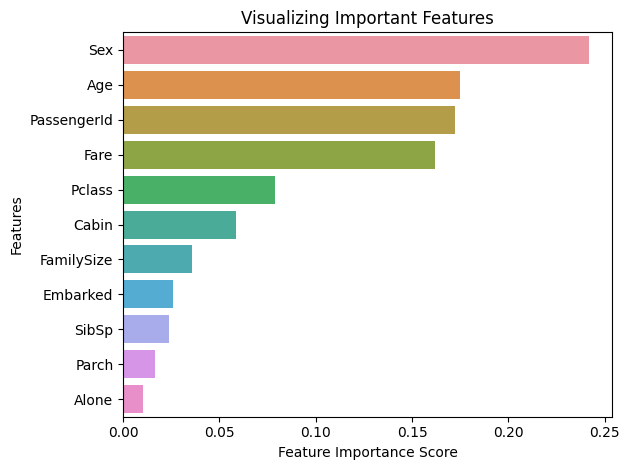

In [2]:
# 6.a.2 Modelling - model analysis

feature_imp = pd.Series(clf.feature_importances_, index=processed_train.columns).sort_values(ascending=False)
# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# 81%

# Plot out the features' importance using a barplot

# plt.figure(figuresize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()           

Found out unimportant features:

1. Alone
2. Parch
3. SibSp

In [3]:
# 6.a.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features
new_train = processed_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
new_test = processed_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

# Attempt grid search CV (cross validation)
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'min_samples_split' : [2, 3, 4, 5],
#     'min_samples_leaf' : [1, 2, 3, 4],
}

# Do Hyperparameter Tuning
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

#Train the model using the training sets
# fit the training data to the classifier
# clf = RandomForestClassifier(n_estimators=1000, max_depth=3, max_features=None, max_leaf_nodes=9)
# clf=RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
#                        n_estimators=50)

# Fit the tuned model
tuned_clf=grid_search.best_estimator_
tuned_clf.fit(X_train, y_train)

# make predictions on test
y_pred = tuned_clf.predict(X_test)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


Tuned Accuracy: 0.8324022346368715
Your submission was successfully saved!


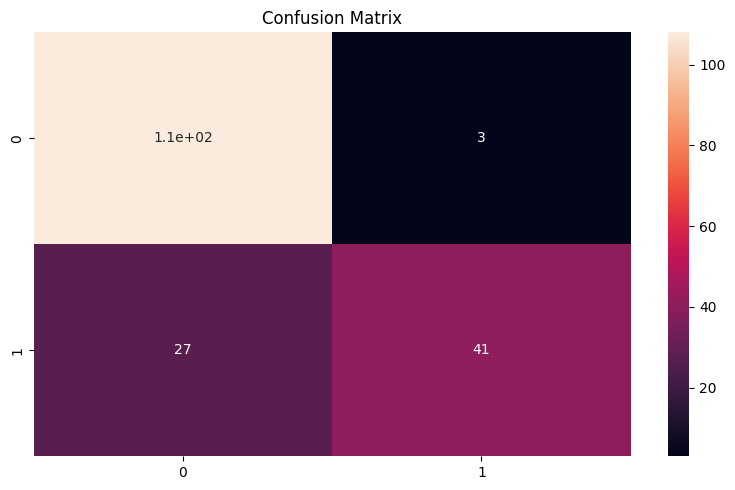

In [5]:
# 6.a.4 Modelling - Result Presentation

test_data = pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Original_Data/test.csv", skipinitialspace=True)

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

# Classification report
# print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_clf.predict(new_test)
# Make a new column to store the predictions
test_data['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
# Assign output to a csv file
# output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of Random Forest Classifier: 

Data: 0.75358, 0.78229, 0.76076, 0.7488, 0.7799
* Lower variation than decision tree

## Advantages: 
* Lower risk of overfitting
* Flexibile (handle both regression and classification)
* Easy to determine feature importance (Gini importance and mean decrease in impurity (MDI))
* Easy to implement

## Disadvantages:
* Time-consuming
* Needs more resources
* More complex than a single decsion tree